# Instacart Market Basket Analysis

## About Instacart 

Whether you shop from meticulously planned grocery lists or let whimsy guide your grazing, our unique food rituals define who we are. Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

## Data Description 

The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. 
* aisles—Contains information about different product categories (aisles).
* departments—provides details about various departments within the store.
* order_products__prior—includes information about products included in prior customer orders.
* order_products__train — Contains details about products in the training set of customer orders.
* orders—provides information about individual orders and customers.
* products—Contains details about products, including aisle and department IDs.

**Citation**

“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 05/08/2024

## Brainstorms 
* Which aisle or department to consider adding or offering more products to it?
* How to make customers never forget instacart?
* When to send reminders to users to shop from instacart? thời gian nào nhiều đặt hàng trong ngày 
* When to recommend products that have a high ratio of being reordered?
* When is it most beneficial to both customer and business to make free coupons and offers?

## Import Library and Read Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import datetime

In [2]:
aisles = pd.read_csv('aisles.csv')
department = pd.read_csv('departments.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv') 
products = pd.read_csv('products.csv')

In [3]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [4]:
department

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [6]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [7]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [8]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


### Merge table 

In [9]:
order_products = pd.concat([order_products_train, order_products_prior])
order_products = (
    order_products
    .merge(products, on='product_id', how='left')
    .merge(orders, on='order_id', how='left')
    .merge(department, on='department_id')
    .merge(aisles, on='aisle_id')
)

In [10]:
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3420344,4268,4,1,Spot's Stew Chicken Cat Food,41,8,14846,prior,37,1,10,6.0,pets,cat food care
33819102,3420746,41370,7,1,Core Turkey & Chicken Liver Canned Cat Food,41,8,133548,prior,9,1,14,7.0,pets,cat food care
33819103,3420746,10863,9,1,Grain Free Turkey & Salmon Formula Cat Food,41,8,133548,prior,9,1,14,7.0,pets,cat food care
33819104,3421072,28134,6,0,Grain Free Turkey Canned Cat Food,41,8,50050,prior,3,3,19,26.0,pets,cat food care


## Reorder Ratio 

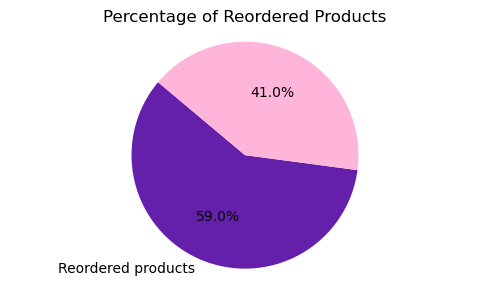

In [12]:
reordered_products = order_products[order_products['reordered'] == 1]

percentage_reorder_products = (len(reordered_products) / len(order_products)) * 100

colors = ['#6420AA', '#FFB5DA']
plt.figure(figsize = (5,3))
plt.pie([percentage_reorder_products, 100 - percentage_reorder_products], labels=['Reordered products', ''], colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Reordered Products')
plt.axis('equal')
plt.tight_layout()
plt.show()


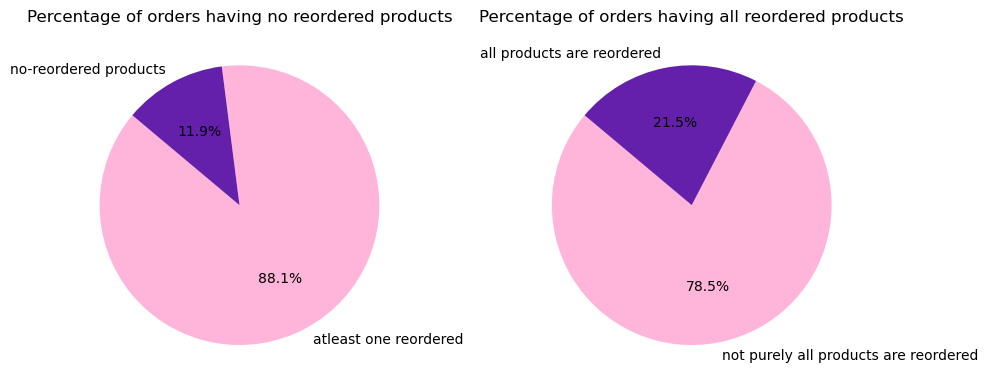

In [14]:
ratio_reorder = order_products.groupby(['order_id']).agg({'reordered':'mean', 'order_number':'first'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
ratio_reorder['all_reordered'] = ratio_reorder['reordered_ratio'] == 1.0
ratio_reorder['no_reordered'] = ratio_reorder['reordered_ratio'] == 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
colors = ['#FFB5DA', '#6420AA']

no_reordered = ratio_reorder['no_reordered'].value_counts(normalize = 1) 
ax1.pie(no_reordered.values, labels=['atleast one reordered', 'no-reordered products'], colors = colors, autopct='%1.1f%%', startangle=140)
ax1.set_title('Percentage of orders having no reordered products')


all_reordered = ratio_reorder['all_reordered'].value_counts(normalize = 1) 
ax2.pie(all_reordered.values, labels=['not purely all products are reordered', 'all products are reordered'], colors = colors, autopct='%1.1f%%', startangle=140)
ax2.set_title('Percentage of orders having all reordered products')

plt.tight_layout()
plt.show()


* The proportion of reordered products out of the total ordered products is 59%.
* 11.9% of orders have no reordered products.
* 21.5% of orders have all products as reordered products.

## Basket

In [15]:
baskets = order_products.groupby(['order_id'])['product_id'].count().reset_index().rename(columns = {'product_id': 'num_of_products'})
baskets

,order_id,num_of_products
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26
...,...,...
3346078,3421079,1
3346079,3421080,9
3346080,3421081,7
3346081,3421082,7


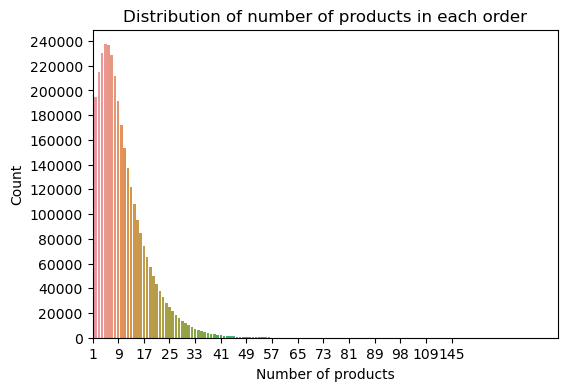

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='num_of_products', data=baskets)
plt.title('Distribution of number of products in each order')
plt.xlabel('Number of products')
plt.ylabel('Count')
plt.xlim(0, max(baskets['num_of_products']))
plt.locator_params(nbins=15)
plt.show()


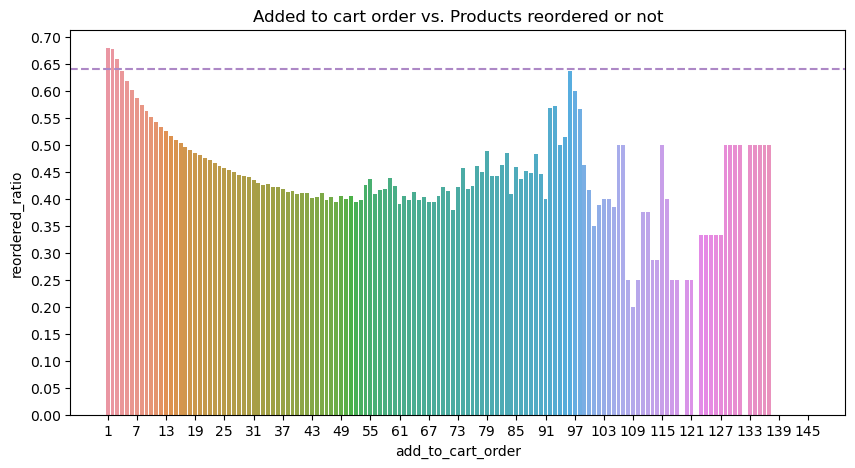

In [20]:
added_post_reorder = order_products.groupby(['add_to_cart_order']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})

plt.figure(figsize = (10,5))
sns.barplot(x='add_to_cart_order', y='reordered_ratio', data=added_post_reorder)
plt.title('Added to cart order vs. Products reordered or not')
plt.axhline(y = 0.64, color = '#AD88C6', linestyle = '--')
plt.locator_params(nbins=25)
plt.show()


In [22]:
num_of_reorder_by_basket = order_products.groupby(['order_id']).agg({'reordered':'sum'}).reset_index().rename(columns={'reordered':'num_of_reordered_products'})
top10 = num_of_reorder_by_basket['num_of_reordered_products'].value_counts(normalize = 1).sort_values(ascending = 0)*100
top10.nlargest(10)
print('Probability of a basket having n reordered products')
print(top10.nlargest(10))

Probability of a basket having n reordered products
0    11.868056
2    10.326791
1    10.262626
3     9.735981
4     8.777965
5     7.679128
6     6.595234
7     5.608229
8     4.735178
9     3.947840
Name: num_of_reordered_products, dtype: float64


* Typically, each basket contains around 5-7 products. 
* Products added to the first basket tend to have a high reorder rate. 
* Most baskets have between 0 to 5 reordered products.

## Purchase behaviours

In [31]:
same_products = order_products[order_products['order_number'] != 1].groupby('user_id').agg({'reordered': 'mean', 'order_number': 'count'}).rename(columns={'reordered': 'reordered_ratio'})
same_products[same_products['reordered_ratio'] == 1]
# có 685 khách hàng luôn mua đi mua lại những sản phẩm này --> check xem sản phẩm gì, bao nhiêu ngày lại mua 1 lần  

,reordered_ratio,order_number
user_id,,
203,1.0,7
318,1.0,6
347,1.0,8
610,1.0,16
619,1.0,4
...,...,...
204769,1.0,5
205017,1.0,8
205302,1.0,7


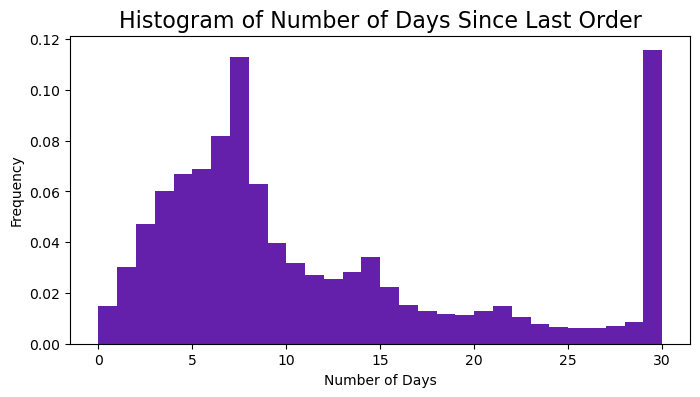

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(order_products['days_since_prior_order'], density=True, bins=30, color = '#6420AA')
plt.title('Histogram of Number of Days Since Last Order', fontsize=16)
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()

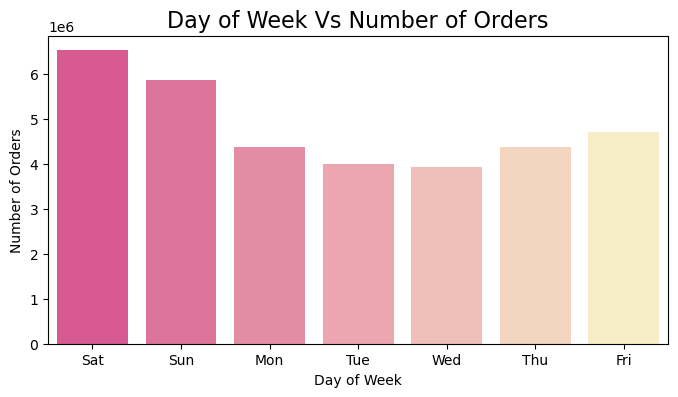

In [27]:
plt.figure(figsize=(8, 4))
colors= ['#ec458d', '#ef6295', '#f27e9e', '#f69ba6', '#f9b8ae', '#fcd4b7', '#fff1bf']
ax = sns.countplot(x='order_dow', data=order_products, palette = colors)
ax.set_title('Day of Week Vs Number of Orders', fontsize=16)
ax.set_xticklabels(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

C:\Users\AD\AppData\Local\Temp\ipykernel_17020\1548401350.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = orders_by_day_hour.pivot('order_dow', 'order_hour_of_day', 'order_count')


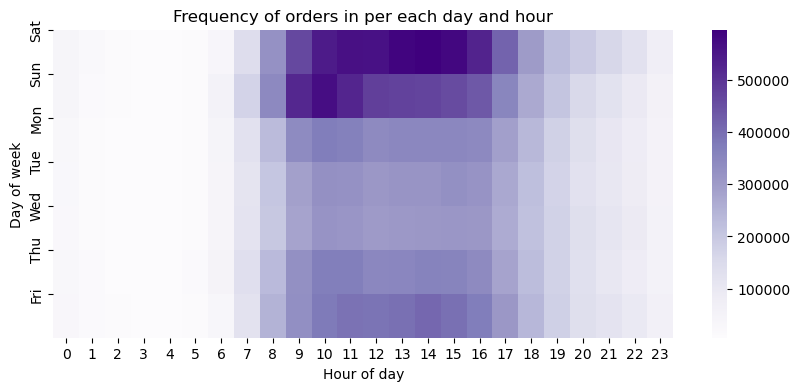

In [41]:
orders_by_day_hour = order_products.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='order_count')
pivot_table = orders_by_day_hour.pivot('order_dow', 'order_hour_of_day', 'order_count')
plt.figure(figsize = (10,4))
sns.heatmap(pivot_table, cmap = 'Purples')
plt.title('Frequency of orders in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()

* There are 685 customers who consistently repurchase products they've bought before. 
* These customers typically reorder within one week or one month. 
* Reordering probability is low after one week. Saturdays and Sundays are the busiest days for orders. 
* The peak order hours are from 9:00 AM to 4:00 PM, with the highest order volumes at 2:00 PM on Saturdays and 10:00 AM on Sundays.

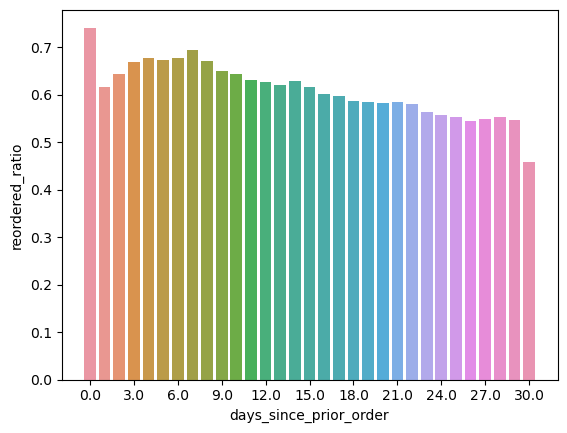

In [30]:
order_cycle = order_products.groupby(['days_since_prior_order']).agg({'reordered': 'mean'}).rename(columns = {'reordered': 'reordered_ratio'})
sns.barplot(x=order_cycle.index, y='reordered_ratio', data=order_cycle)
plt.locator_params(nbins=15)
plt.show()

* 75% of the products purchased within a day are reordered on the same day.
* 68% of the products purchased are reordered within one week.

## Products

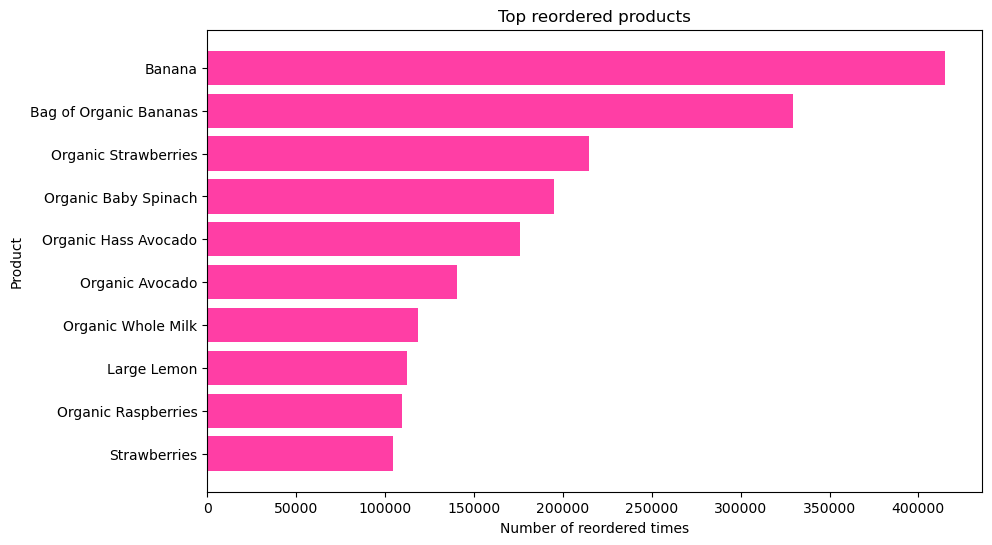

In [33]:
reordered_products = order_products[order_products['reordered'] == 1]

reordered_product_counts = reordered_products['product_name'].value_counts()

top_reordered_products = reordered_product_counts.nlargest(10)

plt.figure(figsize=(10, 6))
plt.barh(y=top_reordered_products.index, width=top_reordered_products.values, color = '#FF3EA5')
plt.xlabel('Number of reordered times')
plt.ylabel('Product')
plt.title('Top reordered products')
plt.gca().invert_yaxis() 
plt.show()

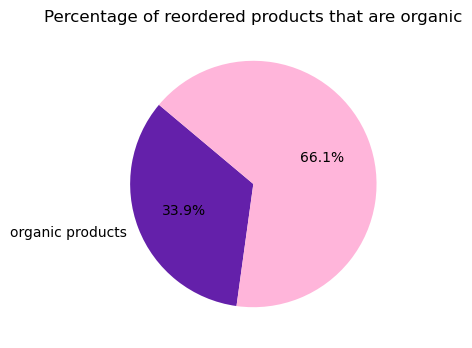

In [34]:
reordered_products_organic = reordered_products[reordered_products['product_name'].str.contains('[Oo]rganic')]
organic_products_percent = len(reordered_products_organic) / len(reordered_products) * 100 
colors = ['#6420AA', '#FFB5DA']

plt.figure(figsize=(6, 4))
plt.pie([organic_products_percent, 100 - organic_products_percent], labels=['organic products', ''], colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of reordered products that are organic')
plt.show()

* Products that are most reordered: 
    * Banana
    * Bags of organic banana
    * Organic strawberies 
    * Organic baby spinach 
    * Organic hass avocado 
* Organic products are the most frequently purchased. Specifically, organic items have a reorder rate of up to 40%.

### Organic products analysis

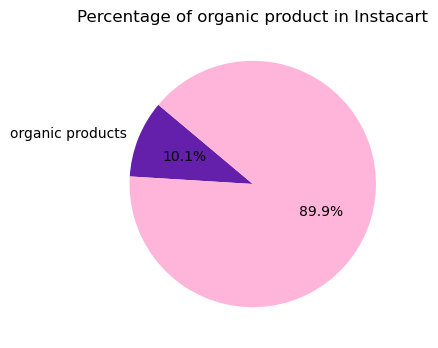

In [35]:
organic = order_products[order_products['product_name'].str.contains('[Oo]rganic')]
organic_percent = organic['product_id'].nunique() / order_products['product_id'].nunique() * 100 
colors = ['#6420AA', '#FFB5DA']
plt.figure(figsize=(6, 4))
plt.pie([organic_percent, 100 - organic_percent], labels=['organic products', ''], colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of organic product in Instacart')
plt.show()

C:\Users\AD\AppData\Local\Temp\ipykernel_17020\110780959.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = organic_by_day_hour.pivot('order_dow', 'order_hour_of_day', 'order_count')


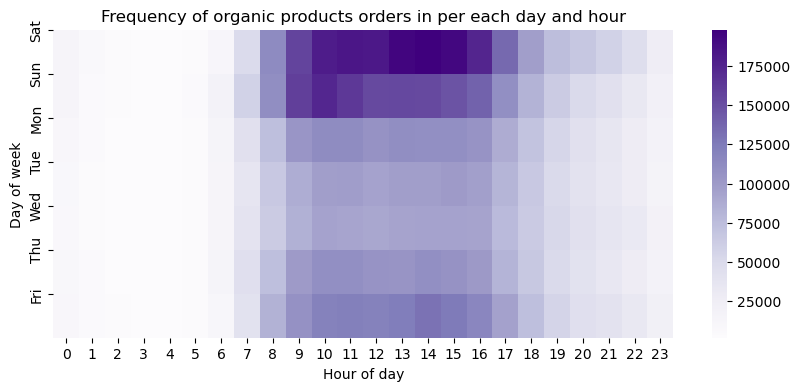

In [40]:
organic_by_day_hour = organic.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='order_count')
pivot_table = organic_by_day_hour.pivot('order_dow', 'order_hour_of_day', 'order_count')
plt.figure(figsize = (10,4))
sns.heatmap(pivot_table, cmap = 'Purples')
plt.title('Frequency of organic products orders in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()


* 10% of the products ordered are organic.
* The heatmap of buying organic products closely resembles the heatmap of buying any products.
This suggests that purchasing organic products is not tied to specific times but rather to the times when orders are predominantly made.

## Departments and Aisles

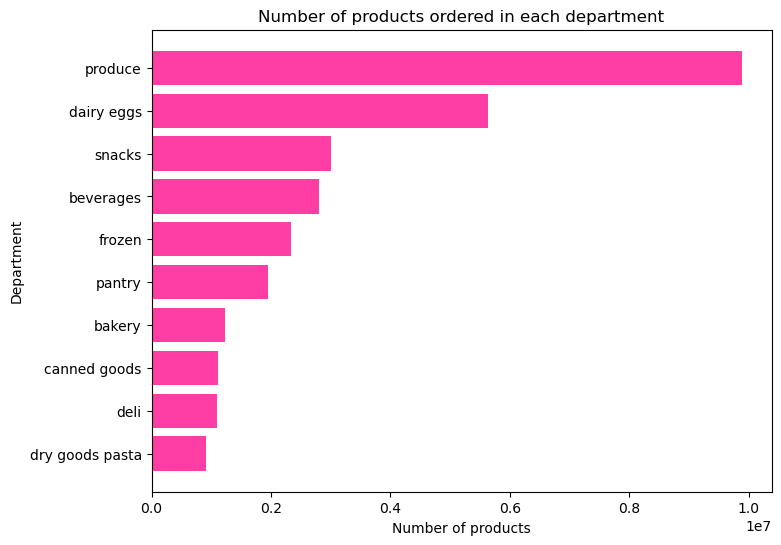

In [42]:
by_department = order_products.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
top = by_department.nlargest(10, columns='products_count')

plt.figure(figsize=(8, 6))
plt.barh(y=top['department'], width=top['products_count'], color = '#FF3EA5')
plt.xlabel('Number of products')
plt.ylabel('Department')
plt.title('Number of products ordered in each department')
plt.gca().invert_yaxis()  

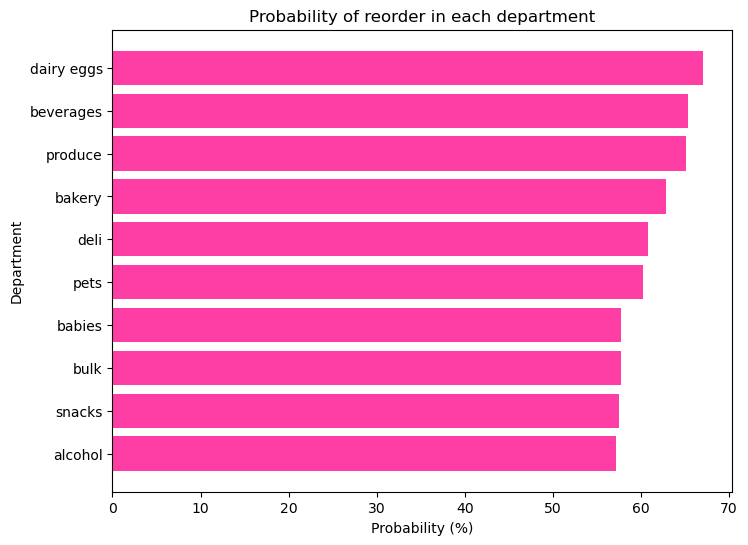

In [43]:
reorder_department = order_products.groupby(['department']).agg({'reordered': 'mean'}).rename(columns={'reordered': 'reorder_ratio'})

top = reorder_department.nlargest(10, 'reorder_ratio')

plt.figure(figsize=(8, 6))
plt.barh(y=top.index, width=top['reorder_ratio']*100, color = '#FF3EA5')
plt.xlabel('Probability (%)')
plt.ylabel('Department')
plt.title('Probability of reorder in each department')
plt.gca().invert_yaxis()
plt.show()

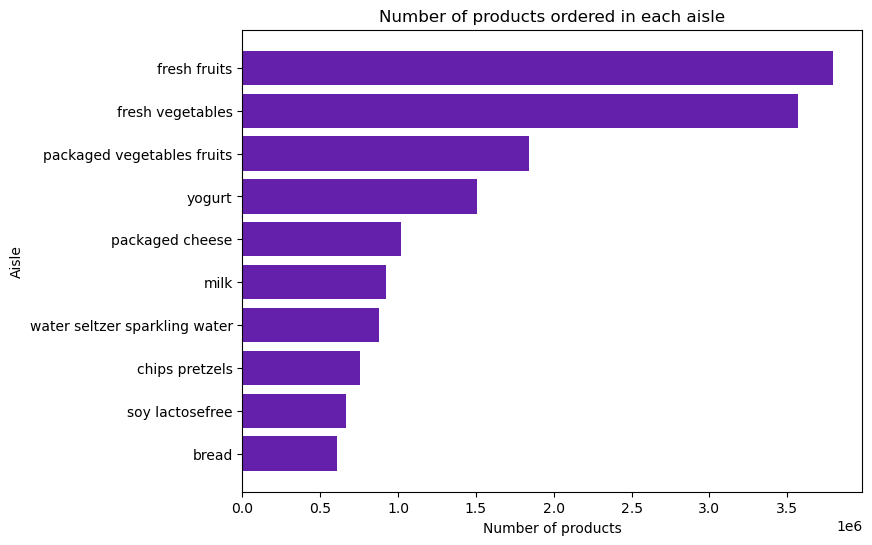

In [44]:
by_aisle = order_products.groupby(['aisle']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
top = by_aisle.nlargest(10, columns='products_count')

plt.figure(figsize=(8, 6))
plt.barh(y=top['aisle'], width=top['products_count'], color = '#6420AA')
plt.xlabel('Number of products')
plt.ylabel('Aisle')
plt.title('Number of products ordered in each aisle')
plt.gca().invert_yaxis() 

## Conclusion

1. Customer Behavior:

* 685 customers consistently repurchase products they've bought before.
* Reordering typically occurs within one week or one month, with a low probability of reordering after one week.
* Saturdays and Sundays are the busiest days for orders.
* Peak order hours are from 9:00 AM to 4:00 PM, with the highest order volumes at 2:00 PM on Saturdays and 10:00 AM on Sundays.
* 75% of products purchased within a day are reordered on the same day.
* 68% of products purchased are reordered within one week.
2. Product Characteristics:

* Organic products constitute 10% of the total orders.
* Organic items have a reorder rate of up to 40%.
3. Ordering Patterns:

* The heatmap of buying organic products closely resembles the heatmap of buying any products, indicating that purchasing organic products is not tied to specific times but rather to the times when orders are predominantly made.

## Recommendation

* **Reminder**: Send reminders to users who haven’t ordered anything in the past 7 days. Since there's a high chance of them ordering on the 7th day, this strategy can encourage them to make their next purchase.
* **Customized Recommendations for Inactive Users**: For customers who haven’t shopped in over 30 days, offer personalized product suggestions based on their past purchases. Avoid suggesting new products to rebuild their trust and loyalty.
* **Timing for Recommending Highly Reordered Products**: Recommend products with a high reorder rate when users have previously ordered on the same day or after a week since their last purchase. This increases the likelihood of successful recommendations based on their buying behavior.
* **Product Recommendation Strategy**: Recommend products with a proven track record of being reordered at the beginning of the shopping journey. Also, suggest related products with low sales but high relevance to items already in their cart to boost overall sales.
* **Strategic Offer Deployment**: Offer discounts or coupons during peak ordering hours each week. Since users are most active during these times, such promotions can drive additional sales and engagement.
* **Expansion of Product Portfolio**: Introduce new organic products to meet the growing demand. Also, consider adding new items in categories with limited choices but high demand, focusing on products similar to top-selling items.

## Next step

* New customer analysis 
* Basket suggestions model 


<Figure size 800x400 with 0 Axes>

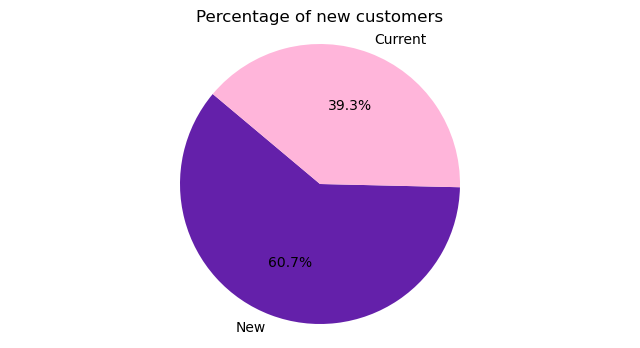

In [45]:
new_customers = order_products[order_products['days_since_prior_order'].isnull()]
plt.figure(figsize=(8, 4))
percentage_new_customers = (len(new_customers) / len(orders)) * 100
colors = ['#6420AA', '#FFB5DA']

plt.figure(figsize=(8, 4))
plt.pie([percentage_new_customers, 100 - percentage_new_customers], labels=['New', 'Current'], colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of new customers')
plt.axis('equal') 
plt.show()